In [1]:
import pandas as pd

# 1. Enrollies' data

## 1.1. Extract data

In [2]:
google_sheet_id = '1VCkHwBjJGRJ21asd9pxW4_0z2PWuKhbLR3gUHm-p4GI'
url='https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
df_enrollies_data = pd.read_excel(url)

In [3]:
df_enrollies_data.head()

,enrollee_id,full_name,city,gender
0,8949,Mike Jones,city_103,Male
1,29725,Laura Jones,city_40,Male
2,11561,David Miller,city_21,NaN
3,33241,Laura Davis,city_115,NaN
4,666,Alex Martinez,city_162,Male


In [4]:
df_enrollies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   enrollee_id  19158 non-null  int64 
 1   full_name    19158 non-null  object
 2   city         19158 non-null  object
 3   gender       14650 non-null  object
dtypes: int64(1), object(3)
memory usage: 598.8+ KB


## 1.2. Transform data

### 1.2.1. Fill NA value in "Gender" column

In [5]:
df_enrollies_data['gender'].value_counts()

,count
gender,
Male,13221
Female,1238
Other,191


In [6]:
df_enrollies_data['gender'] = df_enrollies_data['gender'].fillna("Unknown")

### 1.2.2. Convert 'full_name' column to string

In [7]:
df_enrollies_data['full_name'] = df_enrollies_data['full_name'].astype(str)

### 1.2.3. Convert two remaining columns to category

In [8]:
df_enrollies_data['city'] = df_enrollies_data['city'].astype('category')
df_enrollies_data['gender'] = df_enrollies_data['gender'].astype('category')

In [9]:
# Check data after transforming
df_enrollies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   enrollee_id  19158 non-null  int64   
 1   full_name    19158 non-null  object  
 2   city         19158 non-null  category
 3   gender       19158 non-null  category
dtypes: category(2), int64(1), object(1)
memory usage: 342.1+ KB


# 2. Enrollies' education

## 2.1. Extract data

In [10]:
df_enrollies_edu = pd.read_excel('https://assets.swisscoding.edu.vn/company_course/enrollies_education.xlsx')

In [11]:
df_enrollies_edu.head()

,enrollee_id,enrolled_university,education_level,major_discipline
0,8949,no_enrollment,Graduate,STEM
1,29725,no_enrollment,Graduate,STEM
2,11561,Full time course,Graduate,STEM
3,33241,NaN,Graduate,Business Degree
4,666,no_enrollment,Masters,STEM


In [12]:
df_enrollies_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   enrollee_id          19158 non-null  int64 
 1   enrolled_university  18772 non-null  object
 2   education_level      18698 non-null  object
 3   major_discipline     16345 non-null  object
dtypes: int64(1), object(3)
memory usage: 598.8+ KB


## 2.2. Transform data

In [13]:
df_enrollies_edu['enrolled_university'].value_counts()

,count
enrolled_university,
no_enrollment,13817
Full time course,3757
Part time course,1198


In [14]:
df_enrollies_edu['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [15]:
df_enrollies_edu['major_discipline'].value_counts()

,count
major_discipline,
STEM,14492
Humanities,669
Other,381
Business Degree,327
Arts,253
No Major,223


### 2.2.1. Fill NA value

In [16]:
df_enrollies_edu['enrolled_university'] = df_enrollies_edu['enrolled_university'].fillna(df_enrollies_edu['enrolled_university'].mode()[0])
df_enrollies_edu['education_level'] = df_enrollies_edu['education_level'].fillna(df_enrollies_edu['education_level'].mode()[0])
df_enrollies_edu['major_discipline'] = df_enrollies_edu['major_discipline'].fillna(df_enrollies_edu['major_discipline'].mode()[0])

### 2.2.2. Convert remaining columns to category

In [17]:
df_enrollies_edu['enrolled_university'] = df_enrollies_edu['enrolled_university'].astype('category')
df_enrollies_edu['education_level'] = df_enrollies_edu['education_level'].astype('category')
df_enrollies_edu['major_discipline'] = df_enrollies_edu['major_discipline'].astype('category')

In [18]:
# Check data after transforming
df_enrollies_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   enrollee_id          19158 non-null  int64   
 1   enrolled_university  19158 non-null  category
 2   education_level      19158 non-null  category
 3   major_discipline     19158 non-null  category
dtypes: category(3), int64(1)
memory usage: 206.5 KB


# 3. Enrollies' working experience

## 3.1. Extract data

In [19]:
df_enrollies_workexp = pd.read_csv('https://assets.swisscoding.edu.vn/company_course/work_experience.csv')

In [20]:
df_enrollies_workexp.head()

,enrollee_id,relevent_experience,experience,company_size,company_type,last_new_job
0,8949,Has relevent experience,>20,NaN,NaN,1
1,29725,No relevent experience,15,50-99,Pvt Ltd,>4
2,11561,No relevent experience,5,NaN,NaN,never
3,33241,No relevent experience,<1,NaN,Pvt Ltd,never
4,666,Has relevent experience,>20,50-99,Funded Startup,4


In [21]:
df_enrollies_workexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   enrollee_id          19158 non-null  int64 
 1   relevent_experience  19158 non-null  object
 2   experience           19093 non-null  object
 3   company_size         13220 non-null  object
 4   company_type         13018 non-null  object
 5   last_new_job         18735 non-null  object
dtypes: int64(1), object(5)
memory usage: 898.2+ KB


## 3.2. Transform data

In [22]:
df_enrollies_workexp['relevent_experience'].value_counts()

,count
relevent_experience,
Has relevent experience,13792
No relevent experience,5366


In [23]:
df_enrollies_workexp['experience'].value_counts()

,count
experience,
>20,3286
5,1430
4,1403
3,1354
6,1216
2,1127
7,1028
10,985
9,980


In [24]:
df_enrollies_workexp['company_size'].value_counts()

,count
company_size,
50-99,3083
100-500,2571
10000+,2019
10/49,1471
1000-4999,1328
<10,1308
500-999,877
5000-9999,563


In [25]:
df_enrollies_workexp['company_type'].value_counts()

,count
company_type,
Pvt Ltd,9817
Funded Startup,1001
Public Sector,955
Early Stage Startup,603
NGO,521
Other,121


In [26]:
df_enrollies_workexp['last_new_job'].value_counts()

,count
last_new_job,
1,8040
>4,3290
2,2900
never,2452
4,1029
3,1024


### 3.2.1. Fill NA value

In [27]:
df_enrollies_workexp['relevent_experience'] = df_enrollies_workexp['relevent_experience'].fillna(df_enrollies_workexp['relevent_experience'].mode()[0])
df_enrollies_workexp['experience'] = df_enrollies_workexp['experience'].fillna(df_enrollies_workexp['experience'].mode()[0])
df_enrollies_workexp['company_size'] = df_enrollies_workexp['company_size'].fillna(df_enrollies_workexp['company_size'].mode()[0])
df_enrollies_workexp['company_type'] = df_enrollies_workexp['company_type'].fillna(df_enrollies_workexp['company_type'].mode()[0])
df_enrollies_workexp['last_new_job'] = df_enrollies_workexp['last_new_job'].fillna(df_enrollies_workexp['last_new_job'].mode()[0])

### 3.2.2. Convert data types for remaining columns

In [28]:
# Convert relevent_experience into category
df_enrollies_workexp['relevent_experience'] = df_enrollies_workexp['relevent_experience'].astype('category')

# Bucketize experience columns
df_enrollies_workexp['experience'] = (
    df_enrollies_workexp['experience']
    .replace({'<1': 0, '>20': 21})   # map special cases
    .astype(float)
)

df_enrollies_workexp['experience'] = pd.cut(
    df_enrollies_workexp['experience'],
    bins=[-1, 2, 7, 15, 21],
    labels=['Junior', 'Mid', 'Senior', 'Expert'],
    ordered=True
)

# Convert company_size into category
df_enrollies_workexp['company_size'] = df_enrollies_workexp['company_size'].astype('category')

# Convert company_type into category
df_enrollies_workexp['company_type'] = df_enrollies_workexp['company_type'].astype('category')

# Convert last_new_job into category
df_enrollies_workexp['last_new_job'] = df_enrollies_workexp['last_new_job'].astype('category')

In [29]:
# Check data after transforming
df_enrollies_workexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   enrollee_id          19158 non-null  int64   
 1   relevent_experience  19158 non-null  category
 2   experience           19158 non-null  category
 3   company_size         19158 non-null  category
 4   company_type         19158 non-null  category
 5   last_new_job         19158 non-null  category
dtypes: category(5), int64(1)
memory usage: 244.5 KB


# 4. Training hours

## 4.1. Extract data

In [30]:
pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 35.1 MB/s eta 0:00:00


In [31]:
import mysql.connector

In [32]:
conn = mysql.connector.connect(host = '112.213.86.31',
                               port = '3360',
                               user = 'etl_practice',
                               password = '550814',
                               database = 'company_course')

df_training_hours = pd.read_sql_query('SELECT * FROM training_hours', conn)

/tmp/ipython-input-870837631.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_training_hours = pd.read_sql_query('SELECT * FROM training_hours', conn)


In [33]:
df_training_hours.head()

,enrollee_id,training_hours
0,8949,36
1,29725,47
2,11561,83
3,33241,52
4,666,8


In [34]:
df_training_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   enrollee_id     19158 non-null  int64
 1   training_hours  19158 non-null  int64
dtypes: int64(2)
memory usage: 299.5 KB


## 4.2. Transform data

### 4.2.1. Define outliners

In [35]:
import numpy as np

# Define upper and lower caps (1st and 99th percentile)
lower_cap = df_training_hours['training_hours'].quantile(0.01)
upper_cap = df_training_hours['training_hours'].quantile(0.99)

# Cap the outliers
df_training_hours['training_hours'] = np.clip(
    df_training_hours['training_hours'],
    lower_cap,
    upper_cap
)

# Check result
print(df_training_hours['training_hours'].describe())

count    19158.000000
mean        65.197046
std         59.320308
min          3.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        302.000000
Name: training_hours, dtype: float64


### 4.2.2. Convert training_hours column into category

In [36]:
# Convert continuous hours in training_hours column into categories
bins = [0, 25, 50, 100, 302]
labels = ['Low', 'Medium', 'High', 'Very High']
df_training_hours['training_hours'] = pd.cut(df_training_hours['training_hours'], bins=bins, labels=labels)

In [37]:
# Check data after transforming
df_training_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   enrollee_id     19158 non-null  int64   
 1   training_hours  19158 non-null  category
dtypes: category(1), int64(1)
memory usage: 168.7 KB


# 5. City development index

## 5.1. Extract data

In [38]:
tables = pd.read_html('https://sca-programming-school.github.io/city_development_index/index.html')
df_city_dev_index = tables[0]
df_city_dev_index.head()

,City,City Development Index
0,city_103,0.920
1,city_40,0.776
2,city_21,0.624
3,city_115,0.789
4,city_162,0.767


In [39]:
df_city_dev_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    123 non-null    object 
 1   City Development Index  123 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


## 5.2. Transform data

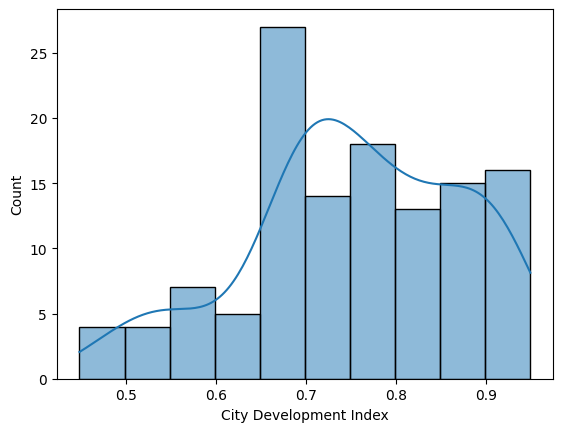

In [40]:
# Check distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_city_dev_index['City Development Index'], bins=10, kde=True)
plt.show()

From the histogram:
* CDI ranges roughly from 0.45 to 0.95.
* It’s right-skewed, with more cities around 0.7–0.75.

It may not be necessary for data transformation.

# 6. Employment

## 6.1. Extract data

In [41]:
df_employment = pd.read_sql_query('SELECT * FROM employment', conn)

/tmp/ipython-input-2926183152.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employment = pd.read_sql_query('SELECT * FROM employment', conn)


In [42]:
df_employment.head()

,enrollee_id,employed
0,1,0.0
1,2,1.0
2,4,0.0
3,5,0.0
4,7,0.0


In [43]:
df_employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   enrollee_id  19158 non-null  int64  
 1   employed     19158 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 299.5 KB


## 6.2. Transform data

In [44]:
# Convert "employed" column to interger type
df_employment['employed'] = df_employment['employed'].astype(int)

In [45]:
# Check data after transforming
df_employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   enrollee_id  19158 non-null  int64
 1   employed     19158 non-null  int64
dtypes: int64(2)
memory usage: 299.5 KB


# Load all data into SQL

In [46]:
import sqlite3
import pandas as pd

# Use sqlite3 to connect to the database
conn = sqlite3.connect('HR_enrollies_data_2025.db')

# Write DataFrames to SQL tables using the sqlite3 connection
df_enrollies_data.to_sql("enrollies_data", con=conn, if_exists="replace", index=False)
df_enrollies_edu.to_sql("enrollies_education", con=conn, if_exists="replace", index=False)
df_enrollies_workexp.to_sql("enrollies_working_experience", con=conn, if_exists="replace", index=False)
df_training_hours.to_sql("training_hours", con=conn, if_exists="replace", index=False)
df_city_dev_index.to_sql("city_development_index", con=conn, if_exists="replace", index=False)
df_employment.to_sql("employment", con=conn, if_exists="replace", index=False)

# Close the connection
conn.close()